In [2]:
import numpy as np
import pandas as pd

### Day 1: The Tyranny of the Rocket Equation Part 1

In [5]:
x = pd.read_csv('./datasets/Day 1 input.csv',header=None)

In [24]:
x.head()

,0
0,80590
1,86055
2,92321
3,131464
4,73326


In [17]:
def fuel_requirements(data):
    total_fuel = 0
    for n in data:
        total_fuel += n//3 - 2
    return total_fuel    

In [20]:
fuel_requirements([1969,100756]

34237

In [22]:
fuel_requirements(x[0])

3285627

### Day 1: The Tyranny of the Rocket Equation Part 2

In [63]:
def fuel_requirements_2(data):
    total_fuel = 0
    for n in data:
        n_fuel = 0
        b = n//3 - 2
        while b > 0:
            n_fuel += b
            b = b//3 - 2  
        total_fuel += n_fuel        
    return total_fuel   

In [64]:
fuel_requirements_2([100756,1969])

51312

In [65]:
fuel_requirements_2(x[0])

4925580

### Day 2: 1202 Program Alarm Part 1

In [875]:
x_2 = pd.read_csv('./datasets/Day 2 input.csv', header=None)
x_2[0][1] = 12
x_2[0][2] = 2

def program_alarm(data):
    op_code_index = 0
    while data[op_code_index] != 99:
        op_code = data[op_code_index]
        a = data[op_code_index+1]
        b = data[op_code_index+2]
        c = data[op_code_index+3]
        if op_code == 1:
            data[c] = data[a]+data[b]
        elif op_code == 2:
            data[c] = data[a]*data[b]
        else:
            print('something went wrong')
        op_code_index += 4
    return data      

In [876]:
program_alarm([1,1,1,4,99,5,6,0,99])

[30, 1, 1, 4, 2, 5, 6, 0, 99]

In [877]:
hello = program_alarm(x_2[0])

In [344]:
x_2

,0
0,1
1,12
2,2
3,3
4,1
...,...
112,99
113,2
114,0
115,14


### Day 2: 1202 Program Alarm Part 2

In [ ]:
x_2a = pd.read_csv('./datasets/Day 2 input.csv', header=None)

In [883]:
x_2a.head()

,0
0,1
1,0
2,0
3,3
4,1


In [ ]:
data[0] == 19690720

In [891]:
def find_inputs(data):
    
    counter = 0
    new_data = []
    
    for noun in range(0,100):
        for verb in range(0,100):
            
            memory = data.copy()
            counter += 1
            memory[0][1] = noun
            memory[0][2] = verb
            new_data = program_alarm(memory[0])
            
            if new_data[0] == 19690720:
                print("noun is " + str(noun))
                print("verb is " + str(verb))
                print("answer is " + str(100*noun + verb))
                break
            else:
                pass
           

In [892]:
find_inputs(x_2a)

noun is 54
verb is 85
answer is 5485


### Day 3: Crossed Wires Part 1

In [557]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

In [518]:
x_3 = pd.read_csv('./datasets/Day 3 input.csv', header=None)

In [491]:
x_3.head()

,0,1
0,R997,L991
1,D443,D492
2,L406,L167
3,D393,D678
4,L66,L228


In [586]:
#start at 0,0
#create co-ordinates
#plot co-ordinates for each line
#find closest intersection      

In [530]:
int(x_3[0][0][1:])

997

In [598]:
def create_coords(data):
    coord_list = []
    co_ords = [0,0]
    for i in data:
        n = 1
        while n <= int(i[1:]):
            
            if i[0] == 'R':                          #positive in x co-ord
                co_ords[0] += 1
            
            elif i[0] == 'U':                        #positivs in y co-ord
                co_ords[1] += 1
            
            elif i[0] == 'L':                        #negative in x co-ord
                co_ords[0] -= 1
           
            else:                                    #negative in y co-ord
                co_ords[1] -= 1
                
            coord_list.extend(co_ords)
            n += 1
    return coord_list     

In [599]:
create_coords(x_3[0])[0:10]

[1, 0, 2, 0, 3, 0, 4, 0, 5, 0]

In [600]:
line_1_x = create_coords(x_3[0])[::2]
line_1_y = create_coords(x_3[0])[1::2]
line_2_x = create_coords(x_3[1])[::2]
line_2_y = create_coords(x_3[1])[1::2]

In [639]:
len(set(zip(line_1_x, line_1_y)) & set(zip(line_2_x, line_2_y)))

74

In [612]:
b = 1000
for i in set(zip(line_1_x, line_1_y)) & set(zip(line_2_x, line_2_y)):
    n = abs(i[0]) + abs(i[1])
    if n < b:
        b = n
print(b)    

232


In [604]:
coords = pd.DataFrame(data = [line_1_x,line_1_y,line_2_x,line_2_y]).T
coords.rename(columns = {0:'x_1',1:'y_1',2:'x_2',3:'y_2'},inplace=True)
coords.shape

(155678, 4)

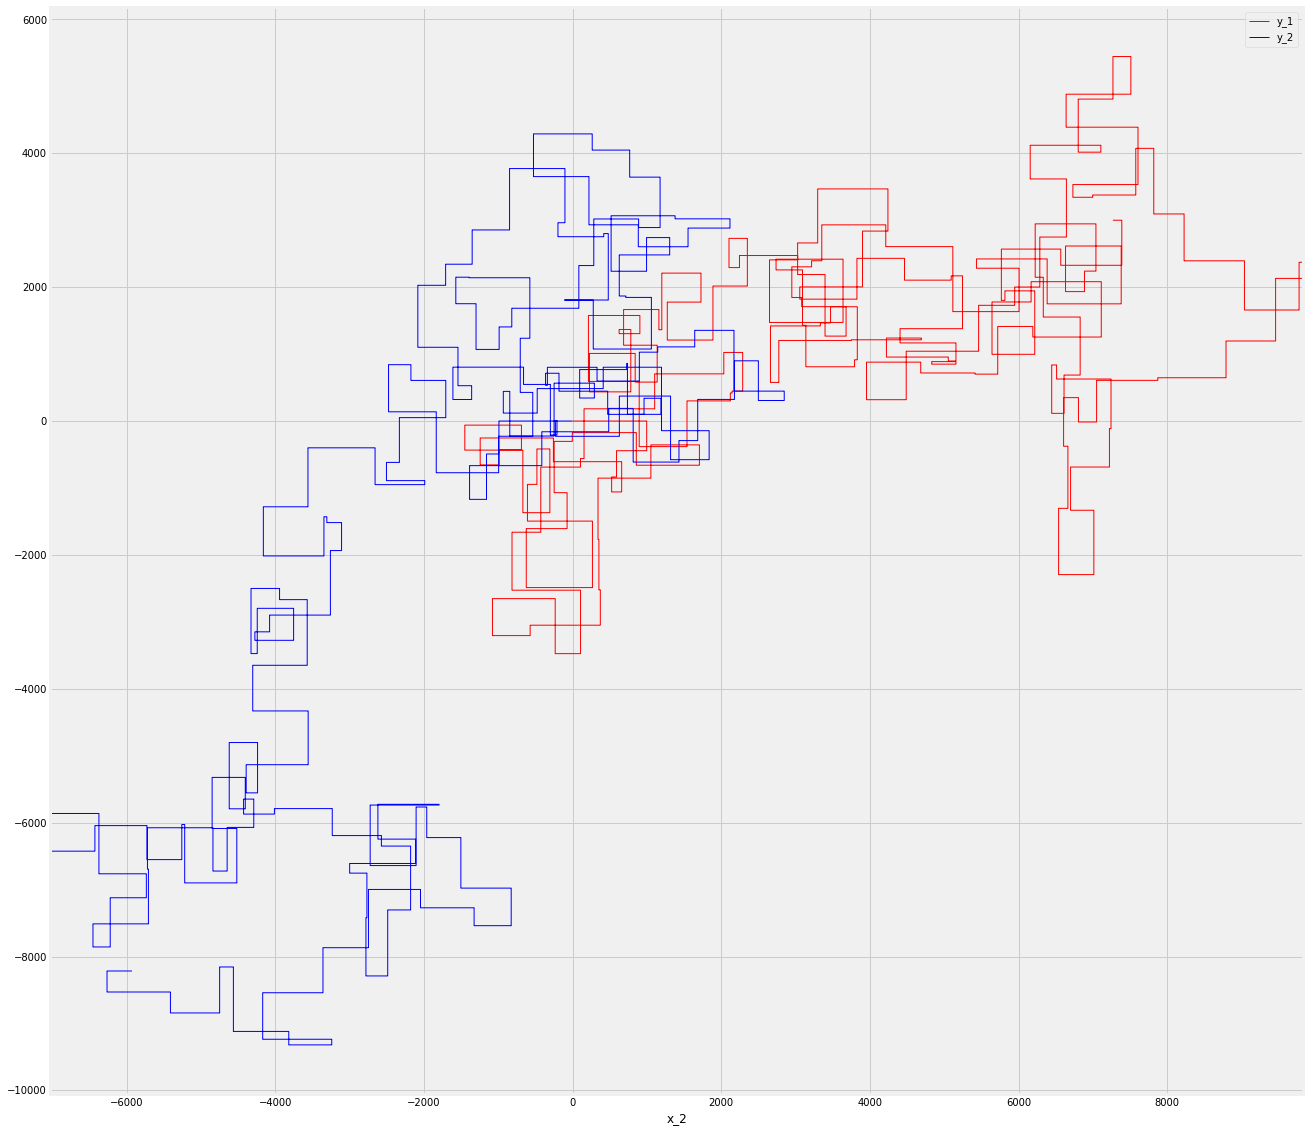

In [605]:
ax = coords.plot(kind = 'line', x='x_1', y='y_1',linewidth = 1, color = 'red',figsize = (20,20))
coords.plot(kind = 'line', x='x_2', y='y_2',linewidth = 1, color = 'blue', ax=ax)


### Day 3: Crossed Wires Part 2

In [619]:
def create_steps(data):
    coord_list = []
    co_ords = [0,0]
    steps = 1
    for i in data:
        n = 1
        while n <= int(i[1:]):
            if i[0] == 'R':                          #positive in x co-ord
                co_ords[0] += 1
            
            elif i[0] == 'U':                        #positivs in y co-ord
                co_ords[1] += 1
            
            elif i[0] == 'L':                        #negative in x co-ord
                co_ords[0] -= 1
           
            else:                                    #negative in y co-ord
                co_ords[1] -= 1
                
            coord_list.extend(co_ords)
            coord_list.append(steps)
            n += 1
            steps += 1
    return coord_list     

In [620]:
create_steps(x_3[0])[0:10]

[1, 0, 1, 2, 0, 2, 3, 0, 3, 4]

In [627]:
line_1_x = create_steps(x_3[0])[::3]
line_1_y = create_steps(x_3[0])[1::3]
line_1_steps = create_steps(x_3[0])[2::3]
line_2_x = create_steps(x_3[1])[::3]
line_2_y = create_steps(x_3[1])[1::3]
line_2_steps = create_steps(x_3[1])[2::3]

In [642]:
coords_1 = pd.DataFrame(data = [line_1_x,line_1_y,line_1_steps]).T
coords_1.rename(columns = {0:'x',1:'y',2:'steps_1'},inplace=True) 

In [643]:
coords_1.head(5)

,x,y,steps_1
0,1,0,1
1,2,0,2
2,3,0,3
3,4,0,4
4,5,0,5


In [644]:
coords_2 = pd.DataFrame(data = [line_2_x,line_2_y,line_2_steps]).T
coords_2.rename(columns = {0:'x',1:'y',2:'steps_2'},inplace=True) 

In [645]:
coords_2.head(5)

,x,y,steps_2
0,-1,0,1
1,-2,0,2
2,-3,0,3
3,-4,0,4
4,-5,0,5


In [649]:
steps = coords_1.merge(coords_2, how = 'inner', on = ['x', 'y'])
steps.head()

,x,y,steps_1,steps_2
0,486,0,486,5598
1,629,0,629,32535
2,815,0,815,6305
3,815,-443,1622,6748
4,-414,-253,4543,4445


In [651]:
steps['total'] = steps['steps_1'] + steps['steps_2']

In [653]:
steps.sort_values(by='total')

,x,y,steps_1,steps_2,total
0,486,0,486,5598,6084
5,-991,-253,5120,1244,6364
2,815,0,815,6305,7120
7,-1158,-655,5859,1813,7672
12,-991,-61,7226,1052,8278
...,...,...,...,...,...
13,-995,-434,8513,73339,81852
54,278,1577,43293,47429,90722
55,783,1076,44981,48435,93416
70,1060,1133,48719,48769,97488


### Day 4: Secure Container Part 1

In [ ]:
153517-630395

In [ ]:
# Two adjacent digits are the same (like 22 in 122345).
# Going from left to right, the digits never decrease; they only ever increase or stay the same (like 111123 or 135679).

In [705]:
a = []
for n in range(153517,630395):
    b = str(n)
    count = 0
    double = 0
    triple = 0
    
    for i in range(0,5):
        if b[i] > b[i+1]:
            count += 1
        elif b[i] == b[i+1]:
            double += 1
                
    if count > 0:
        continue
    elif double == 0:
        continue
    else:    
        a.append(b)
        
print(len(a))                

1729


### Day 4: Secure Container Part 2

In [ ]:
range(153517,630395)

Tried: 1151, 1434, 796, 568

In [871]:
def count_pass(data):
    f = []
    for n in data:
        b = str(n)
        count = 0
        double = 0
        triple = 0
    
        for i in range(0,5):
            if b[i] > b[i+1]:
                count += 1
              
        for i in range(0,10):    
            if b.count(str(i)) == 2:
                double += 1
                    
        if count > 0:
            continue
        elif double == 0:
            continue
        else:    
            f.append(b)         
    print(len(f))
#     print(f)

In [872]:
count_pass([112233,123444,111122])

2


In [873]:
count_pass(range(153517,630395))

1172


### Day 5: Sunny with a Chance of Asteroids Part 1

In [125]:
x_5 = pd.read_csv('./datasets/Day 5 input.csv', header=None)

In [284]:
x_5.head(10)

,0
0,3
1,225
2,1
3,225
4,6
5,6
6,1100
7,1
8,238
9,225


In [285]:
x_5.shape

(678, 1)

In [286]:
def diagnostic_program(data):
    
    input_value = int(input("Input system ID: "))
    op_code_index = 0 #instruction pointer
    output = 0
    
    while str(data[op_code_index])[-2:] != '99':
        
        op_code = str(data[op_code_index])[-2:]  #op code number
        A_mode = str(data[op_code_index])[-3:-2] #parameter one mode
        B_mode = str(data[op_code_index])[-4:-3] #parameter two mode
        C_mode = str(data[op_code_index])[-5:-4] #parameter three mode
        
        ### Parameter one
        a = data[op_code_index+1]
        
        ### Instructions 3&4
        if int(op_code) == 3:
            data[a] = input_value
            op_code_index += 2
        elif int(op_code) == 4:
            output = data[a]
            op_code_index += 2
            
        ### mode adjustment
        elif int(op_code) == 1 or 2:
            
            if A_mode != '1':                   #parameter one
                a = data[data[op_code_index+1]]
            try:
                b = data[op_code_index+2]
                c = data[op_code_index+3]
                if B_mode != '1':               #parameter two
                    b = data[data[op_code_index+2]]    
            except IndexError as target:
                pass
            
            ### Instructions 1&2
            if int(op_code) == 1:
                data[c] = a+b
                op_code_index += 4  
            
            elif int(op_code) == 2:
                data[c] = a*b
                op_code_index += 4
        else:
            print('something went wrong')
                        

    print(output)


In [268]:
[3,0,4,0,99][[3,0,4,0,99][1]]

3

In [287]:
diagnostic_program([3,0,4,0,99])

Input system ID: 10
10


In [288]:
diagnostic_program(x_5[0])

Input system ID: 1
13933662


### Day 5: Sunny with a Chance of Asteroids Part 2

In [137]:
def intcode_computer(data, input_value):
    
#     input_value = int(input("Input system ID: "))
    op_code_index = 0 #instruction pointer
    output = 0
    
    while str(data[op_code_index])[-2:] != '99':
        
        op_code = str(data[op_code_index])[-1:]  #op code number
        A_mode = str(data[op_code_index])[-3:-2] #parameter one mode
        B_mode = str(data[op_code_index])[-4:-3] #parameter two mode
        C_mode = str(data[op_code_index])[-5:-4] #parameter three mode
        
        ### Parameter one
        a = data[op_code_index+1]
        
        ### Instruction 3 is the only 'writing instruction so isn't affected by modes
        if int(op_code) == 3:
            data[a] = input_value
            op_code_index += 2
              
        else:
    
            ### mode adjustments
            if A_mode != '1':                   #parameter one
                a = data[data[op_code_index+1]]
            try:
                b = data[op_code_index+2]
                c = data[op_code_index+3]
                if B_mode != '1':               #parameter two
                    b = data[data[op_code_index+2]]    
            except IndexError as target:
                pass
    
            
            ### Instructions 1, 2, 5, 6, 7, 8
            if int(op_code) == 1:
                data[c] = a+b
                op_code_index += 4  
            
            elif int(op_code) == 2:
                data[c] = a*b
                op_code_index += 4 
                
            elif int(op_code) == 4:
                output = a
                op_code_index += 2   
                
            elif int(op_code) == 5:      
                if a != 0:
                    op_code_index = b
                else:
                    op_code_index += 3 
                    
            elif int(op_code) == 6:
                if a == 0:
                    op_code_index = b   
                else:
                    op_code_index += 3    
                    
            elif int(op_code) == 7:       
                if a < b:
                    data[c] = 1
                else:
                    data[c] = 0
                op_code_index += 4
                
            elif int(op_code) == 8:    
                if a == b:
                    data[c] = 1
                else:
                    data[c] = 0    
                op_code_index += 4
                
            else:
                print('something went wrong')
            
#         print(op_code)
#         print(op_code_index)
#         print(data)
    return output

In [ ]:
test = [3,21,1008,21,8,20,1005,20,22,107,8,21,20,1006,20,31,
1106,0,36,98,0,0,1002,21,125,20,4,20,1105,1,46,104,
999,1105,1,46,1101,1000,1,20,4,20,1105,1,46,98,99]

In [ ]:
test[test[8]]

In [138]:
intcode_computer(test,4)

999

In [126]:
intcode_computer(x_5[0])

Input system ID: 5
2369720


### Day 6: Universal Orbit Map Part 1

In [137]:
x_6 = pd.read_csv('./datasets/Day 6 input.csv', header=None)

In [39]:
x_6.head()

,0
0,Z52)127
1,271)7TV
2,CJN)HYP
3,TCQ)65C
4,2R9)6QM


In [220]:

def orbit_count(data):
    count = 0
    tally = 0
    lists = []
    planet_list = list(data.str.split(")", expand=True)[1])
    duo_list = data.to_list()
    
    while count < len(data):
        
        for duo in duo_list:
            not_in_list = 0

            for orbit_list in lists:
                if orbit_list[-1] == duo[:3]:               ## checking to find a list that can be added to the end
                    orbit_list.append(duo[4:])
                    tally += (len(orbit_list)-1)
                    count += 1

                elif duo[:3] in orbit_list:                 ## creation of a new list from a slice
                    list_ref = orbit_list.index(duo[:3])+1
                    sliced_list = orbit_list[:list_ref]
                    sliced_list.append(duo[4:])
                    lists.append(sliced_list)
                    tally += (len(sliced_list)-1)
                    count += 1
                    break
                else:
                    not_in_list += 1
                    
                                                            ## check to see if new list is needed to be created             
            if len(lists) == not_in_list:
                if duo[:3] in planet_list:
                    duo_list.append(duo)
                else:
                    new_list = [duo[:3],duo[4:]]
                    lists.append(new_list) 
                    tally += 1
                    count += 1
                
            duo_list.remove(duo)    



    return lists
    print(tally)           
                

In [199]:
test = ['COM)BBB',
'BBB)CCC',
'CCC)DDD',
'DDD)EEE',
'EEE)FFF',
'BBB)GGG',
'GGG)HHH',
'DDD)III',
'EEE)JJJ',
'JJJ)KKK',
'KKK)LLL']

In [212]:
test_df = pd.DataFrame(test)

In [213]:
orbit_count(test_df[0])

[['COM', 'BBB', 'CCC', 'DDD', 'III'], ['COM', 'BBB', 'GGG', 'HHH'], ['COM', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF'], ['COM', 'BBB', 'CCC', 'DDD', 'EEE', 'JJJ', 'KKK', 'LLL']]
42


In [216]:
orbit_count(x_6[0])

117672


Guessed : 1571, too low
          15460, too low
          117672, correct!

### Day 6: Universal Orbit Map Part 2

In [221]:
all_lists = orbit_count(x_6[0])

In [248]:
def transfer_count(lists):
    for ls in lists:
        if ls[-1] == 'YOU':
            you_list = ls
        elif ls[-1] == 'SAN':
            santa_list = ls
        else:
            pass
    count = 0    
    for i in zip(you_list,santa_list):
        if i[0] == i[1]:
            count += 1
    
    final_count = len(you_list) + len(santa_list) - (2*count) - 2

    print(final_count)

In [249]:
transfer_count(all_lists)

277


### Day 7: Amplification Circuit Part 1

In [130]:
x_7 = pd.read_csv('./datasets/Day 7 input.csv', header=None)

In [141]:
def intcode_computer2(data,phase_setting,input_value):
    
#     input_value = int(input("Input system ID: "))
    op_code_index = 0 #instruction pointer
    output = 0
    inputs = phase_setting
    
    while str(data[op_code_index])[-2:] != '99':
        
        op_code = str(data[op_code_index])[-1:]  #op code number
        A_mode = str(data[op_code_index])[-3:-2] #parameter one mode
        B_mode = str(data[op_code_index])[-4:-3] #parameter two mode
        C_mode = str(data[op_code_index])[-5:-4] #parameter three mode
        
        ### Parameter one
        a = data[op_code_index+1]
        
        ### Instruction 3 is the only 'writing instruction so isn't affected by modes
        if int(op_code) == 3:
            data[a] = inputs
            inputs = input_value
            op_code_index += 2
              
        else:
    
            ### mode adjustments
            if A_mode != '1':                   #parameter one
                a = data[data[op_code_index+1]]
            try:
                b = data[op_code_index+2]
                c = data[op_code_index+3]
                if B_mode != '1':               #parameter two
                    b = data[data[op_code_index+2]]    
            except IndexError as target:
                pass
    
            
            ### Instructions 1, 2, 5, 6, 7, 8
            if int(op_code) == 1:
                data[c] = a+b
                op_code_index += 4  
            
            elif int(op_code) == 2:
                data[c] = a*b
                op_code_index += 4 
                
            elif int(op_code) == 4:
                output = a
                op_code_index += 2   
                
            elif int(op_code) == 5:      
                if a != 0:
                    op_code_index = b
                else:
                    op_code_index += 3 
                    
            elif int(op_code) == 6:
                if a == 0:
                    op_code_index = b   
                else:
                    op_code_index += 3    
                    
            elif int(op_code) == 7:       
                if a < b:
                    data[c] = 1
                else:
                    data[c] = 0
                op_code_index += 4
                
            elif int(op_code) == 8:    
                if a == b:
                    data[c] = 1
                else:
                    data[c] = 0    
                op_code_index += 4
                
            else:
                print('something went wrong')
            
#         print(op_code)
#         print(op_code_index)
#         print(data)
    return output

In [ ]:
intcode_computer(test,4)
intcode_computer2(data,phase_setting,input_value)

In [ ]:
# Max thruster signal 43210 (from phase setting sequence 4,3,2,1,0):

# 3,15,3,16,1002,`16,10,16,1,16,15,15,4,15,99,0,0

In [149]:
test_1 = [3,31,3,32,1002,32,10,32,1001,31,-2,31,1007,31,0,33,1002,33,7,33,1,33,31,31,1,32,31,31,4,31,99,0,0,0]
test_1_seq = [1,0,4,3,2]

In [150]:
def amplifiers(data,phase_sequence):
    A_output = intcode_computer2(data,phase_sequence[0],0)
    B_output = intcode_computer2(data,phase_sequence[1],A_output)
    C_output = intcode_computer2(data,phase_sequence[2],B_output)
    D_output = intcode_computer2(data,phase_sequence[3],C_output)
    E_output = intcode_computer2(data,phase_sequence[4],D_output)
    return E_output    

In [151]:
amplifiers(test_1,test_1_seq)

65210

In [152]:
from itertools import permutations

In [174]:
for i in permutations(range(0,3)):
    print(i)

(0, 1, 2)
(0, 2, 1)
(1, 0, 2)
(1, 2, 0)
(2, 0, 1)
(2, 1, 0)


In [170]:
def max_thrusters(data):
    thrusts = []
    for i in permutations(range(0,5)):
        thrusts.append(amplifiers(data,i))
    max_thrust = max(thrusts)    
        
    return max_thrust   
    

In [172]:
max_thrusters(x_7[0])

398674

### Day 7: Amplification Circuit Part 2

In [ ]:
def max_thrusters_2(data):
    thrusts = []
    for i in permutations(range(5,10)):
        thrusts.append(amplifiers(data,i))
    max_thrust = max(thrusts)    
        
    return max_thrust   
    

### Day 8: Space Image Format Part 1

In [3]:
x_8 = pd.read_csv('./datasets/Day 8 input.csv', header=None)

In [4]:
numbers = x_8[0][0]

In [22]:
# numbers

In [5]:
chunks, chunk_size = len(numbers), 150
layers = [numbers[i:i+chunk_size] for i in range(0, chunks, chunk_size)]

In [94]:
zero_count = 150
for layer in layers:
    if layer.count('0') < zero_count:
        zero_count = layer.count('0')
        answer = layer.count('1') * layer.count('2')
print(answer)    

1215


### Day 8: Space Image Format Part 2

In [9]:
layers[0][0]

'2'

In [7]:
len(layers[0])

150

In [24]:
final_layer = []
for i in range(0,150):
    for layer in layers:
        if layer[i] == '0':
            final_layer.append('-')
            break
        elif layer[i] == '1':    
            final_layer.append('O')
            break
        else:
            pass

In [14]:
len(final_layer)

150

In [25]:
fl_chunks, fl_chunk_size = len(final_layer), 25
final = [final_layer[i:i+fl_chunk_size] for i in range(0, fl_chunks, fl_chunk_size)]

In [26]:
df = pd.DataFrame(final)

In [27]:
pd.set_option('display.max_columns', 25)

In [28]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,O,-,-,-,-,O,-,-,O,-,-,O,O,-,-,O,O,O,-,-,O,-,-,O,-
1,O,-,-,-,-,O,-,-,O,-,O,-,-,O,-,O,-,-,O,-,O,-,-,O,-
2,O,-,-,-,-,O,O,O,O,-,O,-,-,-,-,O,-,-,O,-,O,O,O,O,-
3,O,-,-,-,-,O,-,-,O,-,O,-,-,-,-,O,O,O,-,-,O,-,-,O,-
4,O,-,-,-,-,O,-,-,O,-,O,-,-,O,-,O,-,-,-,-,O,-,-,O,-
5,O,O,O,O,-,O,-,-,O,-,-,O,O,-,-,O,-,-,-,-,O,-,-,O,-
